In [1]:
#2 marcotullio schultz 2006.pdf
#3 araujo 2014.pdf
#4 grubler 2012
#5 fouquet 2012
#6, curve shape, marchetti nakicenovic 1979
#7 astrid paolo paul 2008.pdf

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
%matplotlib inline
mpl.style.use('classic')

In [3]:
de=pd.read_csv('trans/5e.csv')
dd=pd.read_csv('trans/5d.csv')

In [4]:
x1=dd['coal']
y1=dd['v1']
x2=dd['oil']
y2=dd['v2']

In [5]:
x3=de['coal']
y3=de['v1']
x4=de['oil']
y4=de['v2']

In [6]:
from scipy.interpolate import interp1d

In [7]:
kd1={}
for i in range(len(x1)):
    if ~np.isnan(x1[i]):
        kd1[np.round(x1[i],0)]=y1[i]
kd1[1830]=100
kd1[1972]=0
kd1[1980]=0
fd1=interp1d(sorted(kd1.keys()),[kd1[j] for j in sorted(kd1.keys())])
kd2={}
for i in range(len(x2)):
    if ~np.isnan(x2[i]):
        kd2[np.round(x2[i],0)]=y2[i]
kd2[1830]=100
kd2[1972]=0
kd2[1980]=0
fd2=interp1d(sorted(kd2.keys()),[kd2[j] for j in sorted(kd2.keys())])
ke1={}
for i in range(len(x3)):
    if ~np.isnan(x3[i]):
        ke1[np.round(x3[i],0)]=y3[i]
fe1=interp1d(sorted(ke1.keys()),[ke1[j] for j in sorted(ke1.keys())])
ke2={}
for i in range(len(x4)):
    if ~np.isnan(x4[i]):
        ke2[np.round(x4[i],0)]=y4[i]
ke2[1500]=100
fe2=interp1d(sorted(ke2.keys()),[ke2[j] for j in sorted(ke2.keys())])

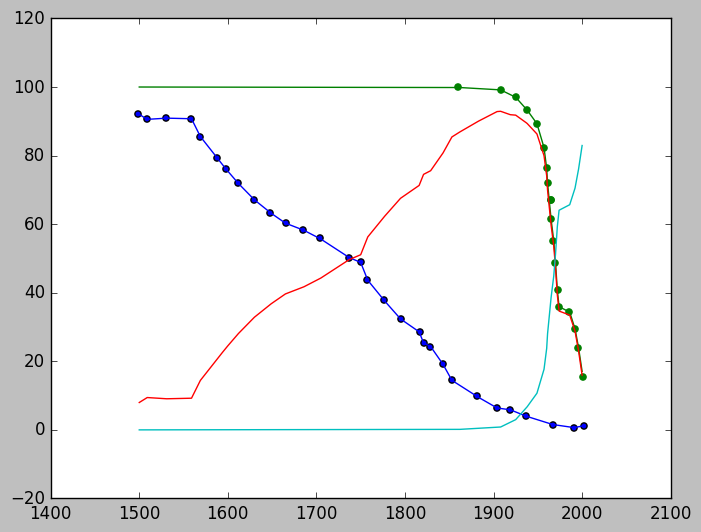

In [8]:
plt.scatter(x3,y3)
plt.scatter(x4,y4,color='green')
years=range(1500,2001)
plt.plot(years,fe1(years))
plt.plot(years,fe2(years))
plt.plot(years,fe2(years)-fe1(years))
c1=fe2(years)-fe1(years)
plt.plot(years,100-fe2(years))
c1b=100-fe2(years)

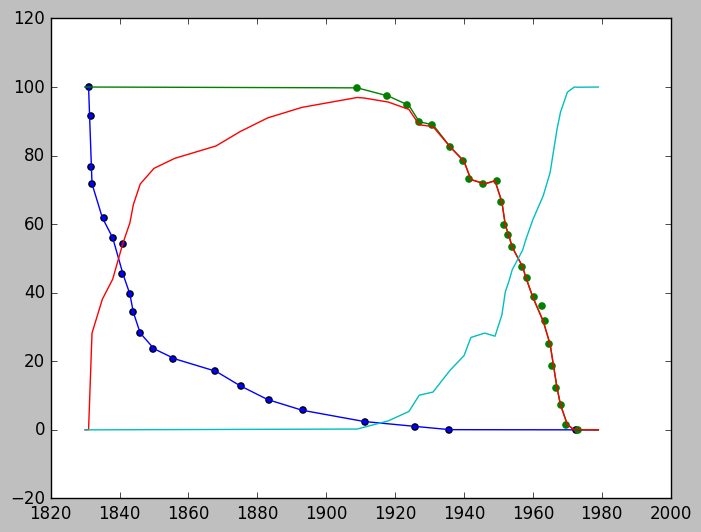

In [9]:
plt.scatter(x1,y1)
plt.scatter(x2,y2,color='green')
years2=range(1830,1980)
plt.plot(years2,fd1(years2))
plt.plot(years2,fd2(years2))
plt.plot(years2,fd2(years2)-fd1(years2))
c2=fd2(years2)-fd1(years2)
plt.plot(years2,100-fd2(years2))
c2b=100-fd2(years2)

$f(t)=1/{(1+e^{-\alpha t- \beta})}$

In [10]:
def gaussian(B,x):
    ''' Returns the gaussian function for B=m,stdev,max,offset '''
    return B[3]+B[2]/(B[1]*N.sqrt(2*N.pi))*N.exp(-((x-B[0])**2/(2*B[1]**2)))
def errfunc(p,x,y):
    return y-gaussian(p,x)
from scipy import optimize

In [11]:
def logist(p,t):
    ''' Returns the gaussian function for B=m,stdev,max,offset '''
    return [1/(1+np.exp(-p[0]*i-p[1])) for i in np.array(t)-p[2]]
def errfunc(p,t,y):
    return y-logist(p,t)
from scipy import optimize

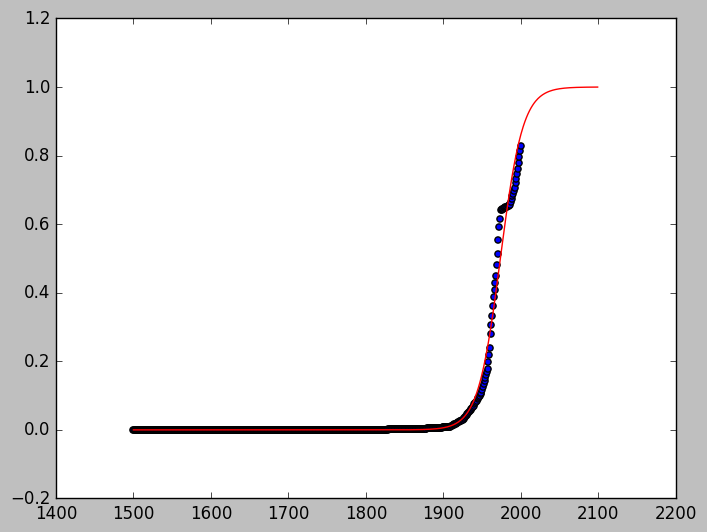

In [12]:
# initial estimate of parameters 
p0 = [1., 1., 2000]
fit = optimize.leastsq(errfunc,p0,args=(np.array(years),c1b/100))
plt.scatter(years,c1b/100)
nyears=range(1500,2100)
plt.plot(nyears,logist(fit[0],np.array(nyears)),'r-')

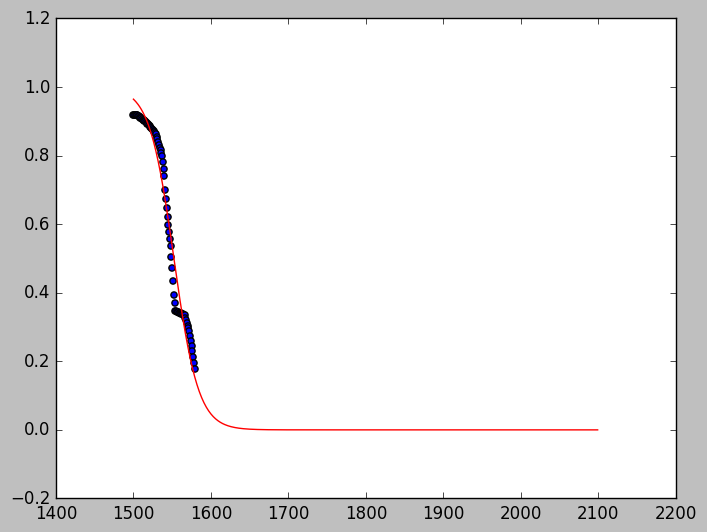

In [13]:
# initial estimate of parameters 
y=c1[420:500]/100
p0 = [1., 1., 1500]
fit = optimize.leastsq(errfunc,p0,args=(np.array(years[:len(y)]),y))
plt.scatter(years[:len(y)],y)
nyears=range(1500,2100)
plt.plot(nyears,logist(fit[0],np.array(nyears)),'r-')

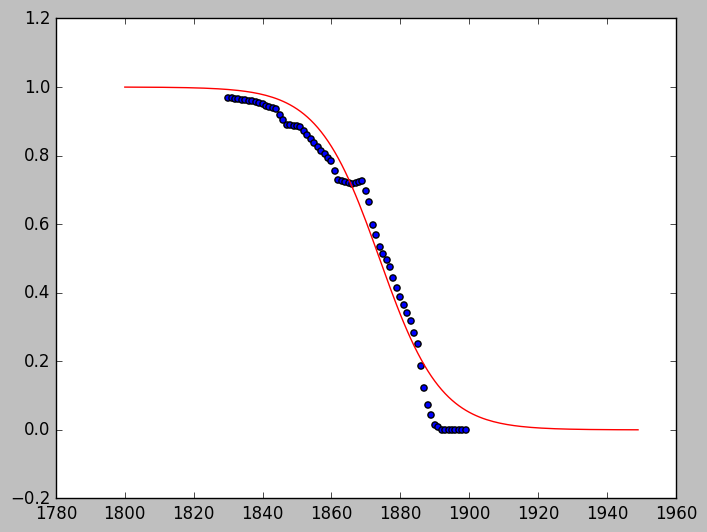

In [14]:
# initial estimate of parameters 
y=c2[80:]/100
p0 = [1., 1., 1830]
fit = optimize.leastsq(errfunc,p0,args=(np.array(years2[:len(y)]),y))
plt.scatter(years2[:len(y)],y)
nyears=range(1800,1950)
plt.plot(nyears,logist(fit[0],np.array(nyears)),'r-')

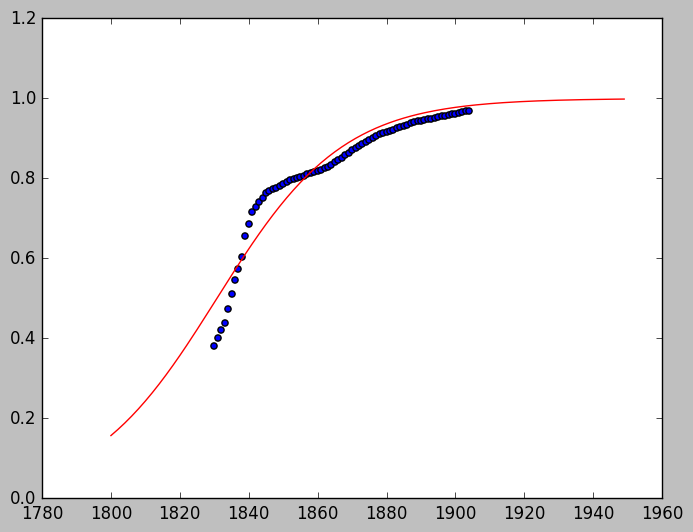

In [15]:
# initial estimate of parameters 
y=c2[5:80]/100
p0 = [1., 1., 1830]
fit = optimize.leastsq(errfunc,p0,args=(np.array(years2[:len(y)]),y))
plt.scatter(years2[:len(y)],y)
nyears=range(1800,1950)
plt.plot(nyears,logist(fit[0],np.array(nyears)),'r-')

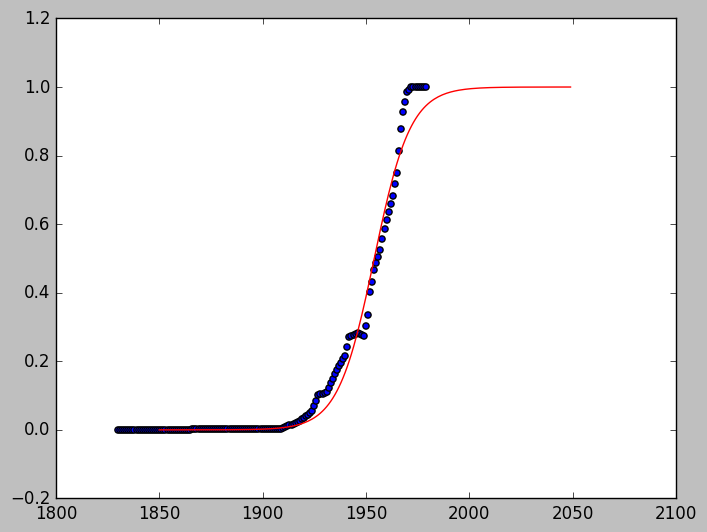

In [16]:
# initial estimate of parameters 
y=c2b[:]/100
p0 = [1., 1., 1930]
fit = optimize.leastsq(errfunc,p0,args=(np.array(years2[:len(y)]),y))
plt.scatter(years2[:len(y)],y)
nyears=range(1850,2050)
plt.plot(nyears,logist(fit[0],np.array(nyears)),'r-')

$f(t)=1/{(1+e^{-\alpha \cdot {e^{-\gamma t}} - \beta})}$

In [17]:
def logist2(p,t):
    return [1/(1+np.exp(-p[0]*(np.exp(-p[3]*i))-p[1])) for i in np.array(t)-p[2]]
def errfunc2(p,t,y):
    return y-logist2(p,t)
from scipy import optimize

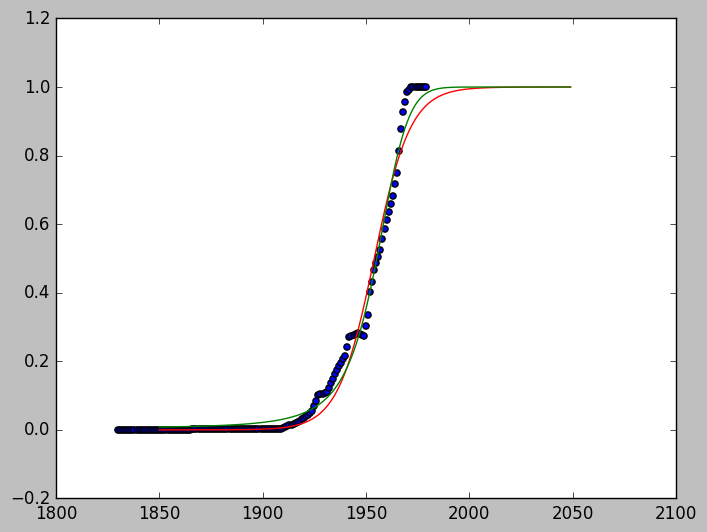

In [18]:
# initial estimate of parameters 
y=c2b[:]/100
p0 = [1., 1., 1930, 0.]
fit = optimize.leastsq(errfunc,p0,args=(np.array(years2[:len(y)]),y))
fit2 = optimize.leastsq(errfunc2,p0,args=(np.array(years2[:len(y)]),y))
plt.scatter(years2[:len(y)],y)
nyears=range(1850,2050)
plt.plot(nyears,logist(fit[0],np.array(nyears)),'r-')
plt.plot(nyears,logist2(fit2[0],np.array(nyears)),'g-')

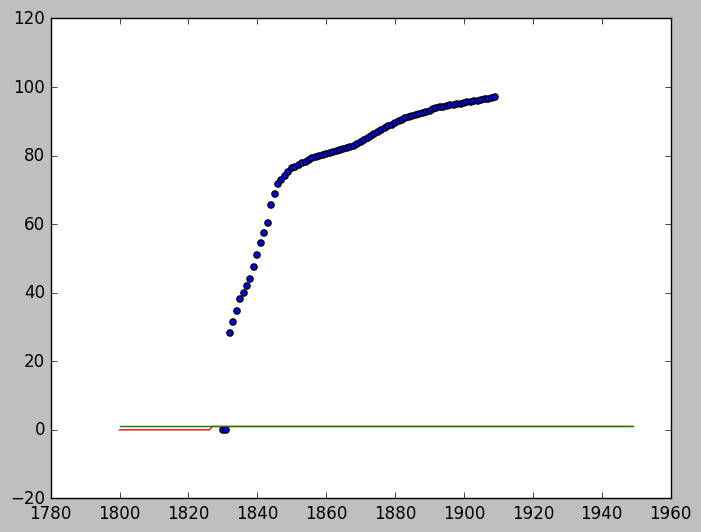

In [19]:
# initial estimate of parameters 
y=c2[:80]
p0 = [1., 1., 1830, 1]
fit = optimize.leastsq(errfunc,p0,args=(np.array(years2[:len(y)]),y))
fit2 = optimize.leastsq(errfunc2,p0,args=(np.array(years2[:len(y)]),y))
plt.scatter(years2[:len(y)],y)
nyears=range(1800,1950)
plt.plot(nyears,logist(fit[0],np.array(nyears)),'r-')
plt.plot(nyears,logist2(fit2[0],np.array(nyears)),'g-')

In [20]:
#run once
c1/=100.0
c1b/=100.0
c2/=100.0
c2b/=100.0

In [21]:
def plotter(ax,x,y,c,l,z=2,w=-50):
    yrs=range(x[0]-50,x[len(x)-1]+10)
    maxi=[0,0]
    maxv=-100
    
    #try a few initial values for maximum rsquared
    i=0
    for k in range(1,5):
        p0 = [1., 1., x[len(x)*k/5]]
        fit2 = optimize.leastsq(errfunc,p0,args=(x,y),full_output=True)
        ss_err=(fit2[2]['fvec']**2).sum()
        ss_tot=((y-y.mean())**2).sum()
        rsquared=1-(ss_err/ss_tot)
        if rsquared>maxv:
            maxi=[i,k]
            maxv=rsquared

    i=maxi[0]
    k=maxi[1]
    
    p0 = [1., 1., x[len(x)*k/5], -1+i*0.5]
    fit2 = optimize.leastsq(errfunc,p0,args=(x,y),full_output=True)
    ss_err=(fit2[2]['fvec']**2).sum()
    ss_tot=((y-y.mean())**2).sum()
    rsquared=1-(ss_err/ss_tot)

    
    ax.scatter(x,y,lw*3,color=c,label=l)
    ax.plot(yrs,logist(fit2[0],yrs),color="#444444",lw=lw)
    
    yk=logist([fit2[0][0],fit2[0][1],fit2[0][2],fit2[0][3]],range(3000))
    mint=0
    maxt=3000
    perc=0.1
    for i in range(3000):
        if yk[i]<perc: mint=i
        if yk[i]<1-perc: maxt=i
    
    coord=len(x)*z/5
    ax.annotate('$R^2 = '+str(np.round(rsquared,2))+'$\n'+\
                '$\\alpha = '+str(np.round(fit2[0][0],2))+'$\n'+\
                '$\\beta = '+str(np.round(fit2[0][1],2))+'$\n'+\
                '$\\Delta t = '+str(int(maxt-mint))+'$', xy=(yrs[coord], logist(fit2[0],yrs)[coord]),\
                xycoords='data', 
                xytext=(w, 30), textcoords='offset points', color="#444444",
                arrowprops=dict(arrowstyle="->",color='#444444'))    

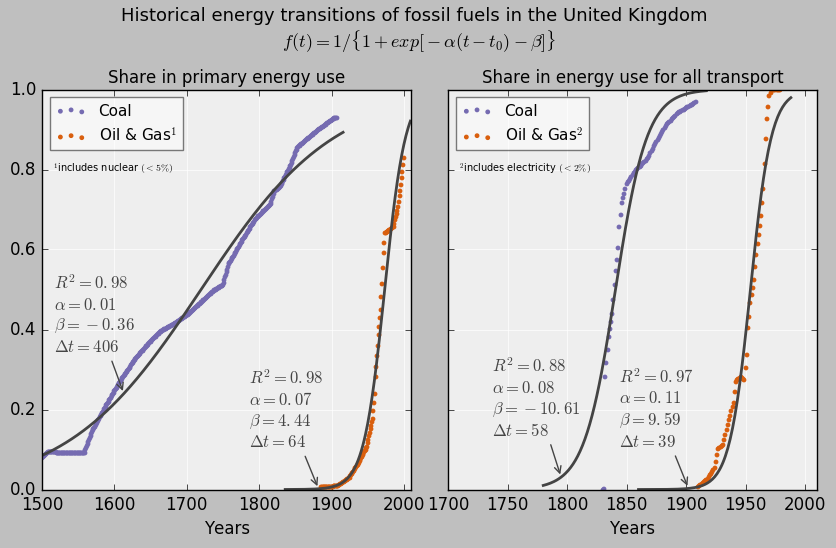

In [22]:
fig, ax = plt.subplots(1,2,subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True),figsize=(10,5))
lw=2
plt.subplots_adjust(wspace=0.1)

colors=["#756bb1","#d95f0e"]
colors=["#756bb1","#d95f0e"]

m=c1.argmax()
yes=True
i=0
while yes:
    if c1b[i]>0.005: yes=False
    else: i+=1
x=years[:m]
y=c1[:m]
plotter(ax[0],x,y,colors[0],'Coal',2)
x=years[i:]
y=c1b[i:]
plotter(ax[0],x,y,colors[1],'Oil & Gas$^1$')
m=c2.argmax()
yes=True
i=0
while yes:
    if c2b[i]>0.005: yes=False
    else: i+=1
x=years2[:m]
y=c2[:m]
plotter(ax[1],x,y,colors[0],'Coal',1)
x=years2[i:]
y=c2b[i:]
plotter(ax[1],x,y,colors[1],'Oil & Gas$^2$',3)

ax[0].grid(color='white', linestyle='solid')
ax[1].grid(color='white', linestyle='solid')
ax[0].set_xlabel('Years')
ax[1].set_xlabel('Years')
ax[0].set_xlim([1500,2010])
ax[1].set_xlim([1700,2010])
ax[0].set_ylim([0,1])
ax[1].set_ylim([0,1])
ax[0].legend(loc=2,framealpha=0.5,fontsize=11)
ax[1].legend(loc=2,framealpha=0.5,fontsize=11)
ax[1].set_yticklabels([])
ax[0].set_title('Share in primary energy use',size=12)
ax[1].set_title('Share in energy use for all transport',size=12)
ax[0].text(0.03,0.82,'$^1$includes nuclear $(<5\%)$',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax[0].transAxes,fontsize=7)
ax[1].text(0.03,0.82,'$^2$includes electricity $(<2\%)$',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax[1].transAxes,fontsize=7)


plt.suptitle(u'Historical energy transitions of fossil fuels in the United Kingdom \n $f(t)=1/{\{1+exp[-\\alpha (t-t_0) - \\beta}]\}$',fontsize=13,y=1.06)
plt.savefig('ces6.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

In [23]:
def plotter2(ax,x,y,c,l,z=2,w=-50):
    yrs=range(x[0]-50,x[len(x)-1]+10)
    maxi=[0,0]
    maxv=-100
    
    #try a few initial values for maximum rsquared
    for i in range(5):
        for k in range(1,5):
            p0 = [1., 1., x[len(x)*k/5], -1+i*0.5]
            fit2 = optimize.leastsq(errfunc2,p0,args=(x,y),full_output=True)
            ss_err=(fit2[2]['fvec']**2).sum()
            ss_tot=((y-y.mean())**2).sum()
            rsquared=1-(ss_err/ss_tot)
            if rsquared>maxv:
                maxi=[i,k]
                maxv=rsquared
    
    i=maxi[0]
    k=maxi[1]
    
    p0 = [1., 1., x[len(x)*k/5], -1+i*0.5]
    fit2 = optimize.leastsq(errfunc2,p0,args=(x,y),full_output=True)
    ss_err=(fit2[2]['fvec']**2).sum()
    ss_tot=((y-y.mean())**2).sum()
    rsquared=1-(ss_err/ss_tot)

    
    ax.scatter(x,y,lw*3,color=c,label=l)
    ax.plot(yrs,logist2(fit2[0],yrs),color="#444444",lw=lw)
    
    yk=logist2([fit2[0][0],fit2[0][1],fit2[0][2],fit2[0][3]],range(3000))
    mint=0
    maxt=3000
    perc=0.1
    for i in range(3000):
        if yk[i]<perc: mint=i
        if yk[i]<1-perc: maxt=i
    
    coord=len(x)*z/5
    ax.annotate('$R^2 = '+str(np.round(rsquared,2))+'$\n'+\
                '$\\alpha = '+str(np.round(fit2[0][0],2))+'$\n'+\
                '$\\beta = '+str(np.round(fit2[0][1],2))+'$\n'+\
                '$\\gamma = '+str(np.round(fit2[0][3],3))+'$\n'+\
                '$\\Delta t = '+str(int(maxt-mint))+'$', xy=(yrs[coord], logist2(fit2[0],yrs)[coord]),\
                xycoords='data', 
                xytext=(w, 30), textcoords='offset points', color="#444444",
                arrowprops=dict(arrowstyle="->",color='#444444'))    

In [ ]:
fig, ax = plt.subplots(1,2,subplot_kw=dict(axisbg='#EEEEEE',axisbelow=True),figsize=(10,5))
lw=2
plt.subplots_adjust(wspace=0.1)

colors=["#756bb1","#d95f0e"]
colors=["#756bb1","#d95f0e"]

m=c1.argmax()
yes=True
i=0
while yes:
    if c1b[i]>0.005: yes=False
    else: i+=1
x=years[:m]
y=c1[:m]
plotter2(ax[0],x,y,colors[0],'Coal',2)
x=years[i:]
y=c1b[i:]
plotter2(ax[0],x,y,colors[1],'Oil & Gas$^1$')
m=c2.argmax()
yes=True
i=0
while yes:
    if c2b[i]>0.005: yes=False
    else: i+=1
x=years2[:m]
y=c2[:m]
plotter2(ax[1],x,y,colors[0],'Coal',1,-70)
x=years2[i:]
y=c2b[i:]
plotter2(ax[1],x,y,colors[1],'Oil & Gas$^2$',3)

ax[0].grid(color='white', linestyle='solid')
ax[1].grid(color='white', linestyle='solid')
ax[0].set_xlabel('Years')
ax[1].set_xlabel('Years')
ax[0].set_xlim([1500,2010])
ax[1].set_xlim([1700,2010])
ax[0].set_ylim([0,1])
ax[1].set_ylim([0,1])
ax[0].legend(loc=2,framealpha=0.5,fontsize=11)
ax[1].legend(loc=2,framealpha=0.5,fontsize=11)
ax[1].set_yticklabels([])
ax[0].set_title('Share in primary energy use',size=12)
ax[1].set_title('Share in energy use for all transport',size=12)
ax[0].text(0.03,0.82,'$^1$includes nuclear $(<5\%)$',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax[0].transAxes,fontsize=7)
ax[1].text(0.03,0.82,'$^2$includes electricity $(<2\%)$',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax[1].transAxes,fontsize=7)


plt.suptitle(u'Historical energy transitions of fossil fuels in the United Kingdom \n $f(t)=1/{\{1+exp[-\\alpha \cdot {exp(-\\gamma (t-t_0))} - \\beta}]\}$',fontsize=13,y=1.06)
plt.savefig('ces7.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()